## Hola Xime, por favor de la siguiente celda espera unos 3-5 minutos en lo que corre, puedes descargar todo nuestro repo de git aquí -> [equipo_alfa_buena_maravilla_onda_dinamita_escuadron_lobo](https://github.com/fjoh378/equipo_alfa_buena_maravilla_onda_dinamita_escuadron_lobo) y se va a ajecutar sin problemas. Lo que quisismos hacer es poner todo el codigo dinámico, es decir, que no tuvieras que cambiar la path de los archivos para poder ejecutarlo. En teoría si corres este notebook como viene obtendrás las respuestas de esta tarea 

# SALUDOS, BESOS EN SUS DESOS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   _id_              50000 non-null  int64         
 1   _id2_             50000 non-null  int64         
 2   comp_mixto1       50000 non-null  float64       
 3   inversion         50000 non-null  float64       
 4   fecha_inicio      50000 non-null  datetime64[ns]
 5   comp_interno1     50000 non-null  float64       
 6   comp_interno2     50000 non-null  object        
 7   comp_interno3     50000 non-null  float64       
 8   comp_interno4     50000 non-null  float64       
 9   categoria1        50000 non-null  float64       
 10  categoria2        50000 non-null  float64       
 11  categoria3        50000 non-null  float64       
 12  comp_externo1     47831 non-null  float64       
 13  comp_externo2     44410 non-null  float64       
 14  comp_externo3     4999

<ipython-input-26-0d46a4e85529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['porc_inv'] = final['inversion'] / tot_inv


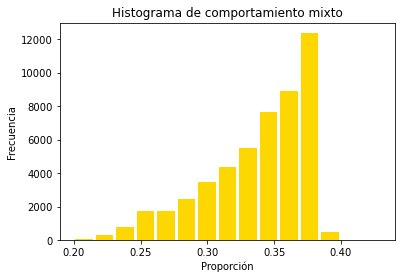

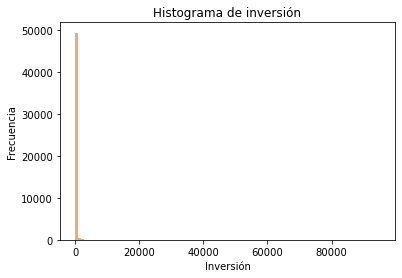

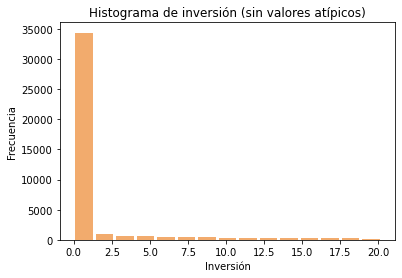

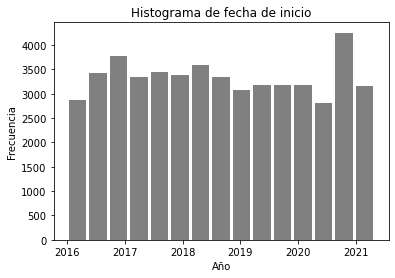

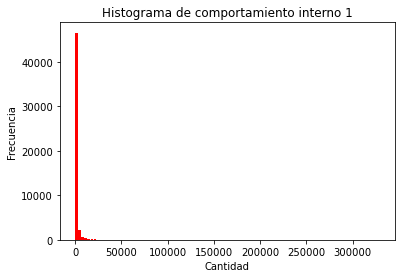

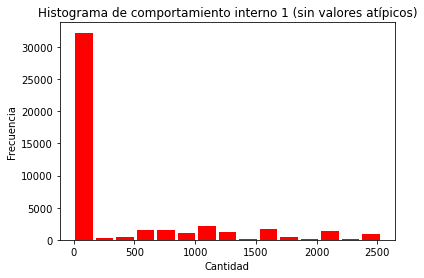

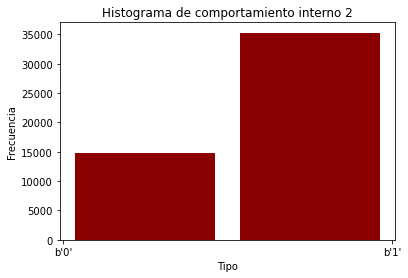

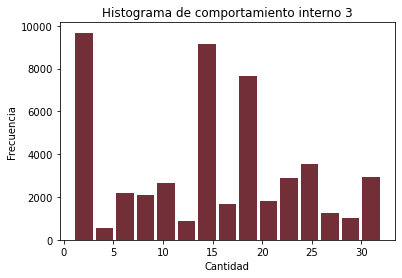

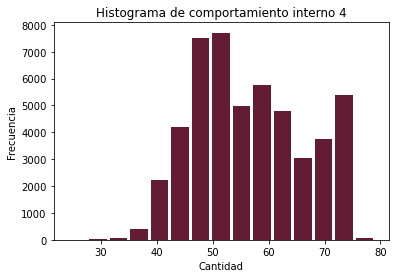

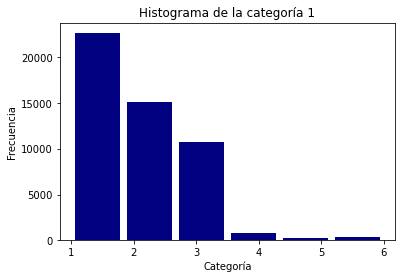

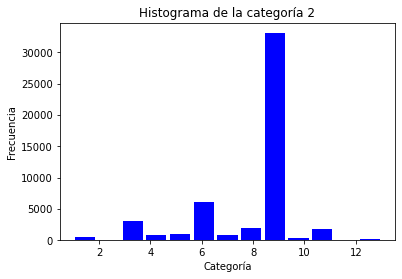

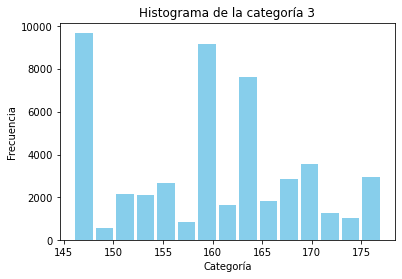

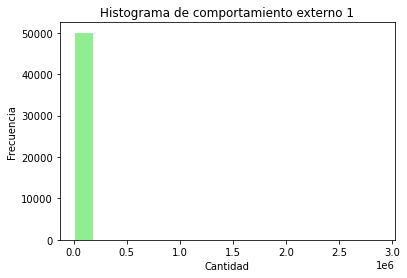

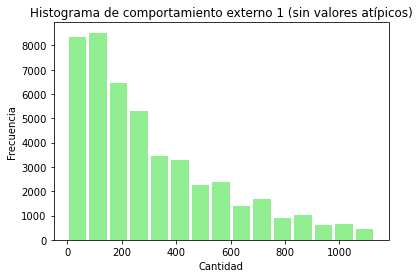

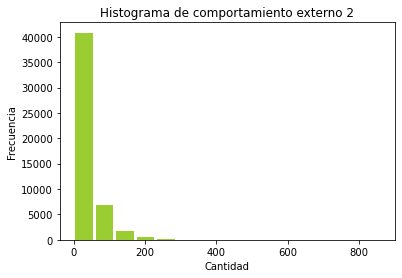

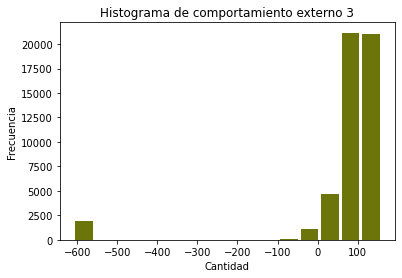

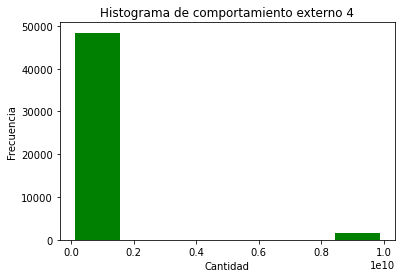

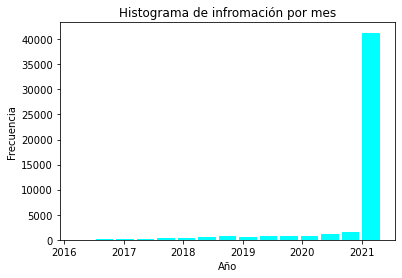

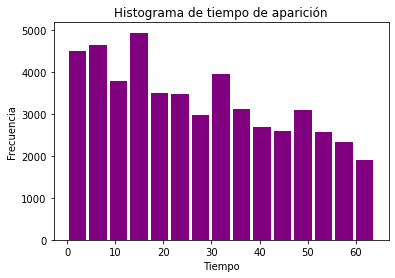

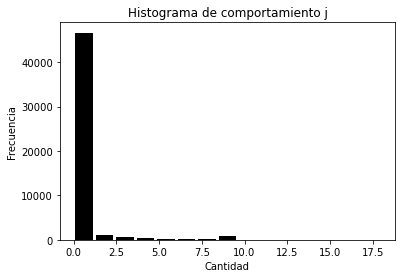

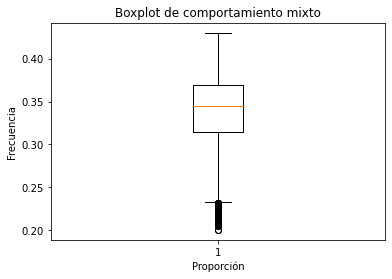

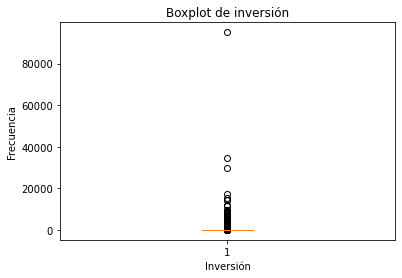

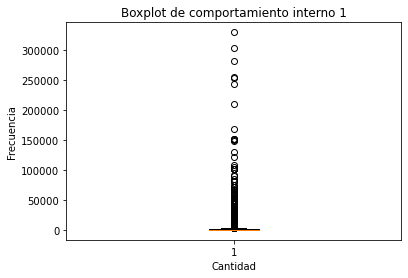

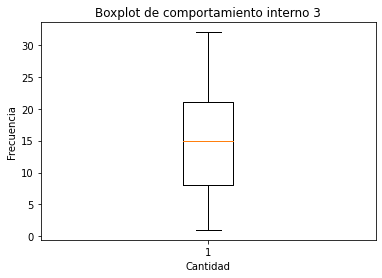

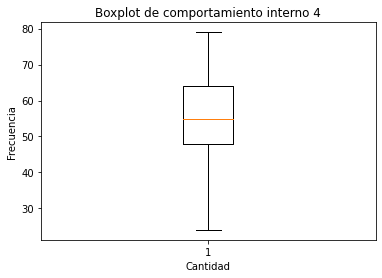

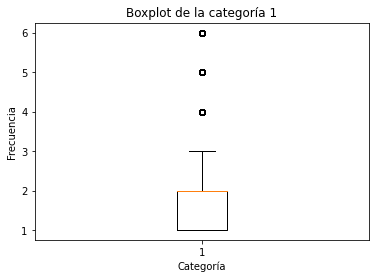

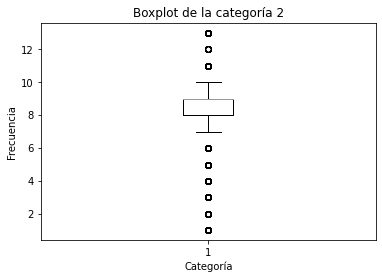

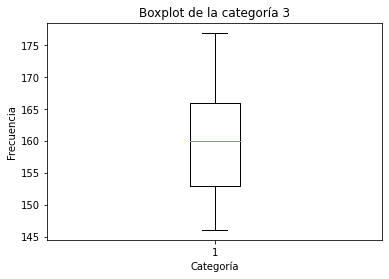

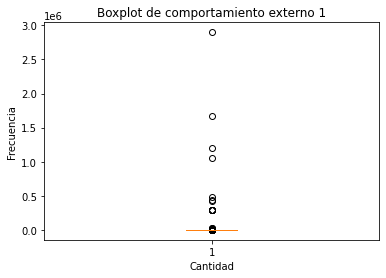

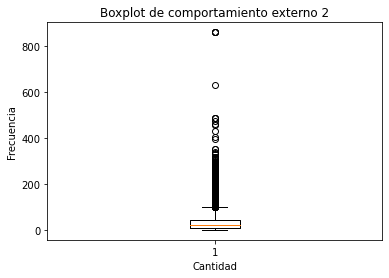

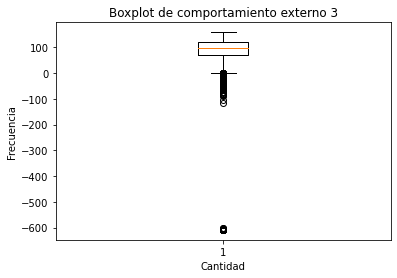

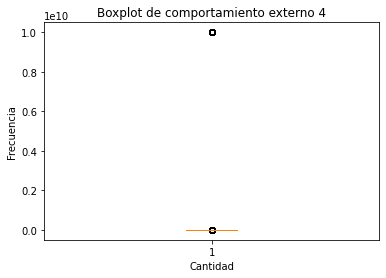

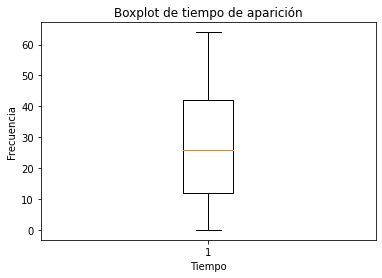

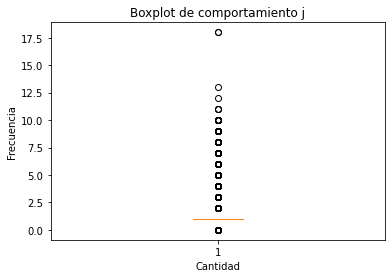

La correlación de los datos es:
                  comp_mixto1  inversion  comp_interno1  comp_interno3  \
comp_mixto1          1.000000  -0.022305      -0.062475       0.037184   
inversion           -0.022305   1.000000       0.036716      -0.004737   
comp_interno1       -0.062475   0.036716       1.000000       0.004324   
comp_interno3        0.037184  -0.004737       0.004324       1.000000   
comp_interno4       -0.079492   0.040115       0.111045       0.014043   
categoria1          -0.059576   0.020377       0.037156       0.032573   
categoria2          -0.019758  -0.007869      -0.027525      -0.078761   
categoria3           0.037184  -0.004737       0.004324       1.000000   
comp_externo1       -0.005081   0.001297       0.005545      -0.011347   
comp_externo2       -0.086676   0.050048       0.119096      -0.026636   
comp_externo3        0.037317   0.006008       0.009149       0.012692   
comp_externo4       -0.052200  -0.002212      -0.006181      -0.025511   
Tiempo

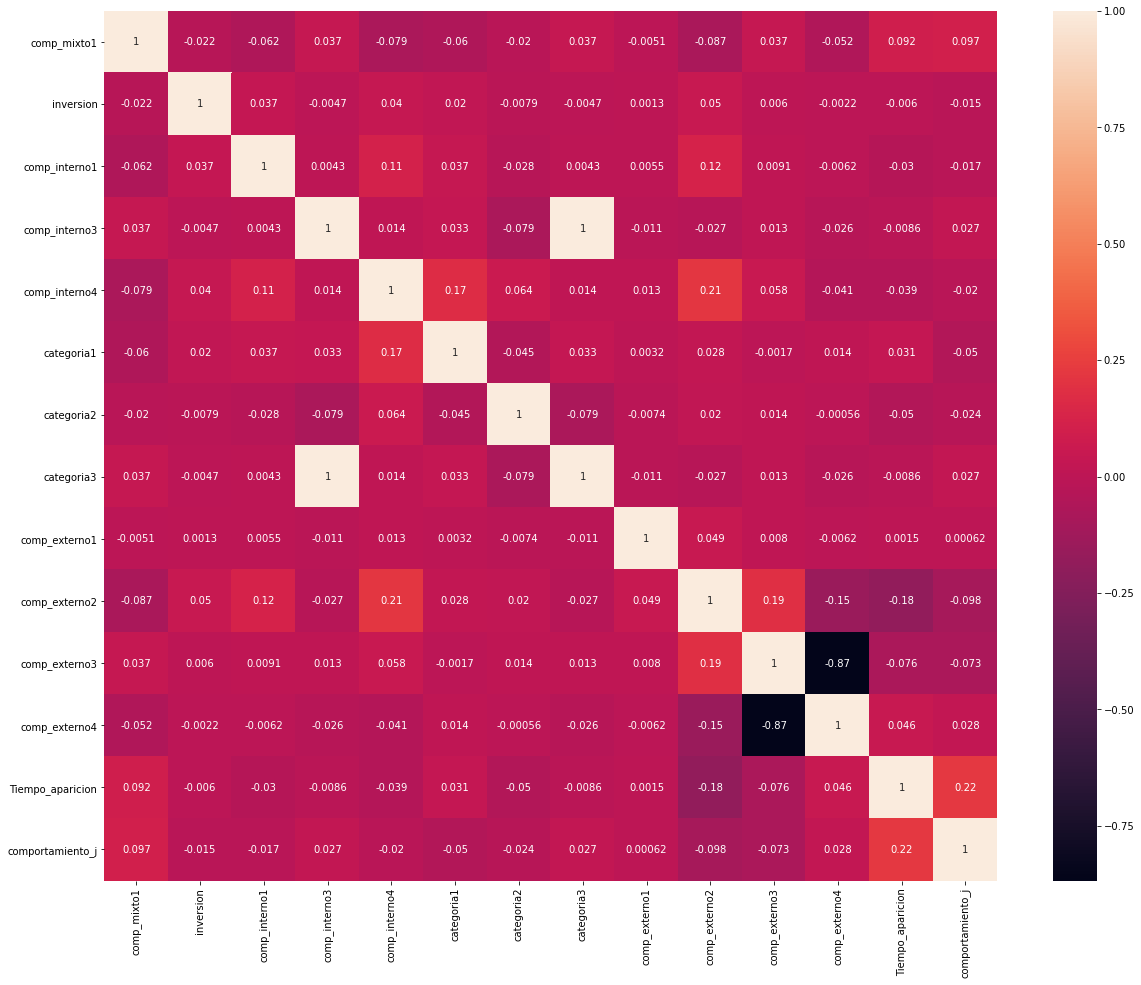

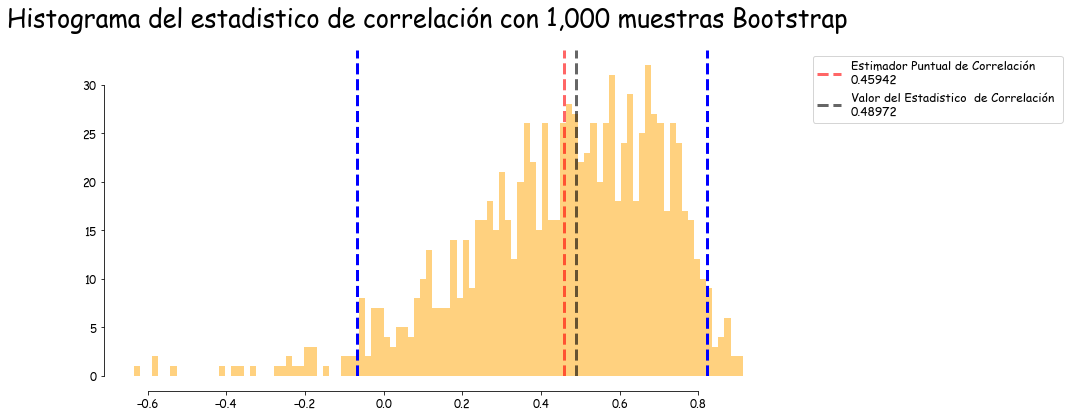

Promedio de la Muestra Bootstrap de Correlación =  0.45942
Valor del Estadistico de Correlación =  0.48972
Desviación Estandar de la Muestra Bootstrap de Correlación =  0.24818
Intervalo de Confianza =  (-0.06722, 0.82280)


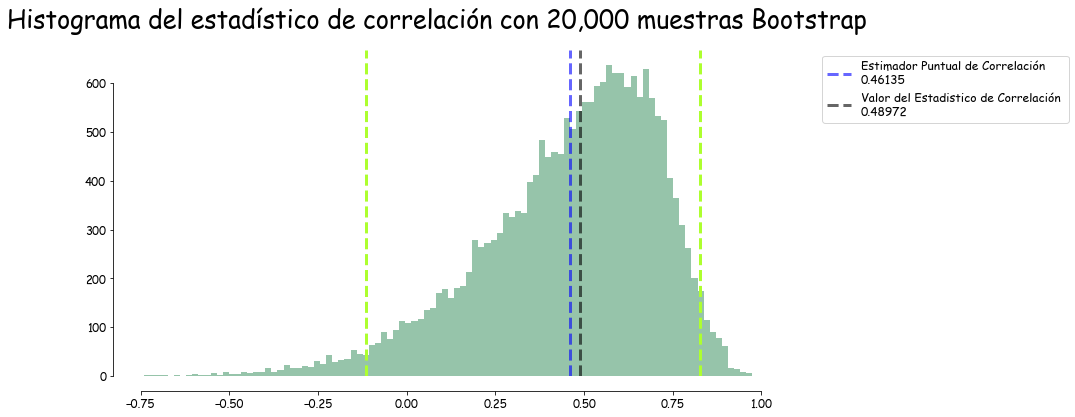

Promedio de la Muestra Bootstrap de Correlación =  0.46135
Valor del Estadistico de Correlación =  0.48972
Desviación Estandar de la Muestra Bootstrap de Correlación =  0.24656
Intervalo de Confianza = (-0.11563, 0.82526)


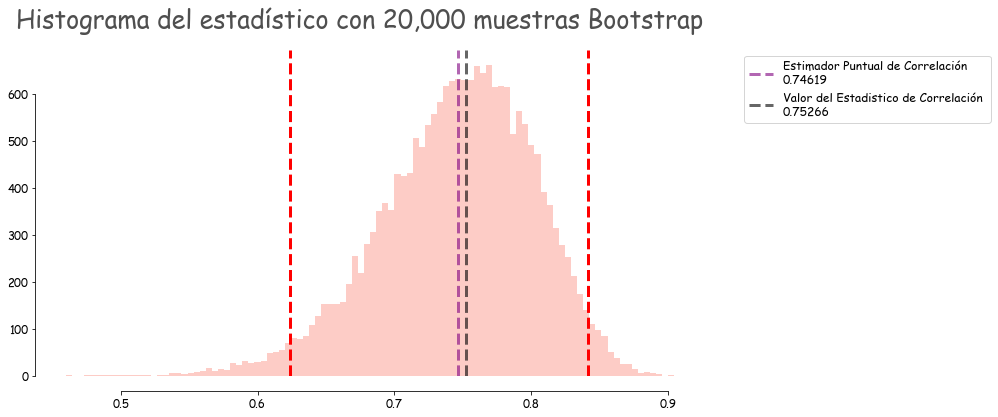

Promedio de la Muestra Bootstrap de Correlación =  0.74619
Valor del Estadistico de Correlación =  0.75266
Desviación Estandar de la Muestra Bootstrap de Correlación =  0.05587
Intervalo de Confianza = (0.62371, 0.84149)


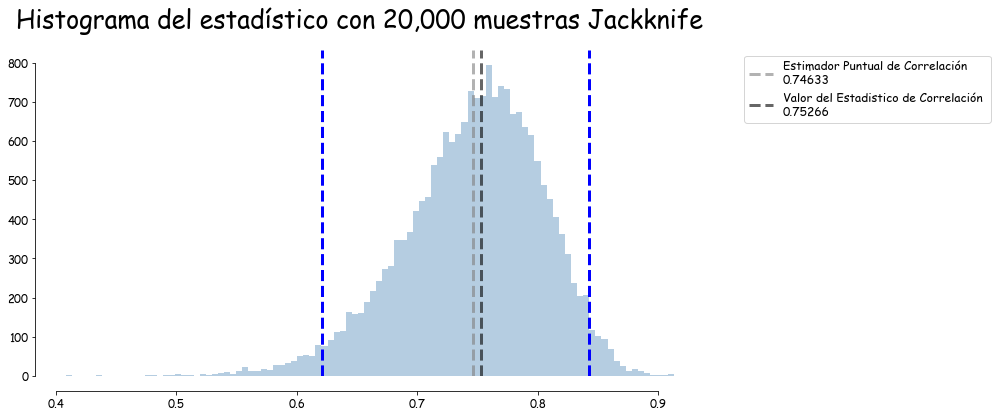

Promedio de la Muestra Jackknife de Correlación =  0.74633
Valor del Estadistico de Correlación =  0.75266
Desviación Estandar de la Muestra Jackknife de Correlación =  0.05719
Intervalo de Confianza = (0.62095, 0.84264)


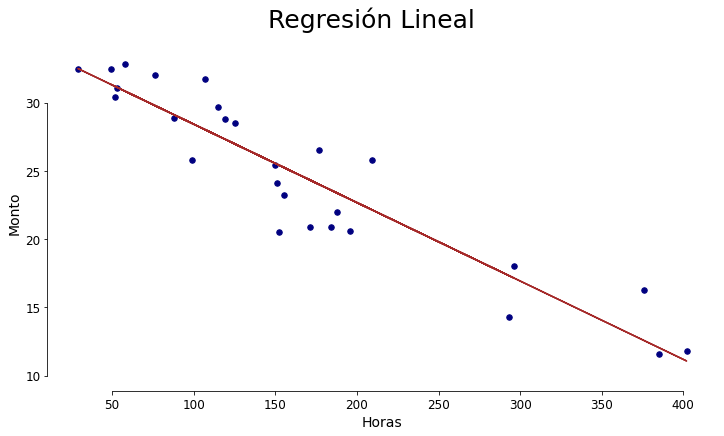

SE Beta 1 = 0.004464173160311538
SE Beta 0 = 0.8671972620941917


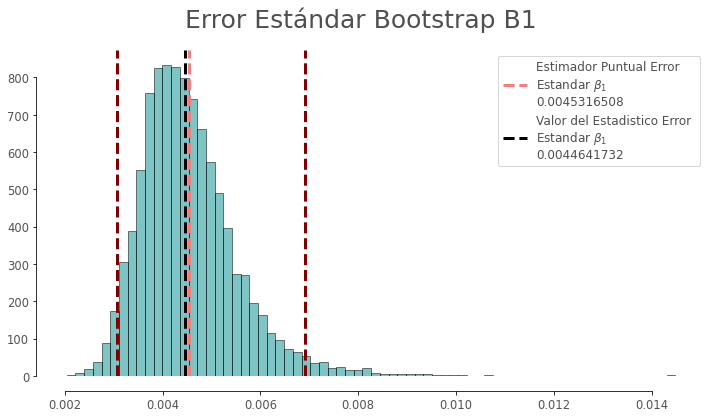

Error Estándar sin Bootsrap =  0.004464173160311538
Promedio de Error Estándar de las muestras Bootstrap =  0.004531650811126156
Intervalo de Confianza = (0.00306, 0.00692)


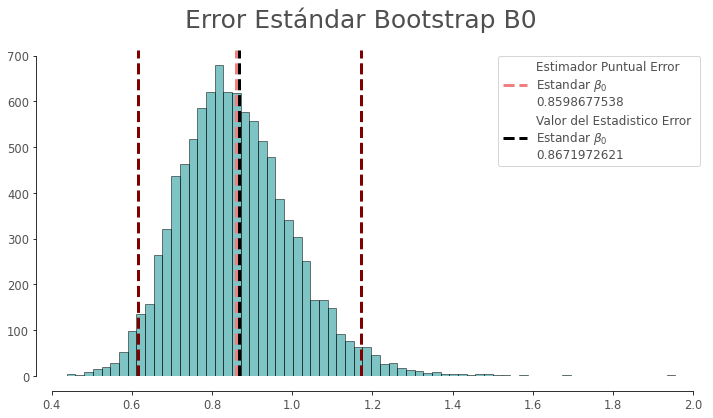

Error Estándar sin Bootstrap =  0.8671972620941917
Promedio de Error Estándar de las muestras Bootstrap =  0.8598677538234486
Intervalo de Confianza = (0.61543, 1.17248)


In [26]:
%run ../Tarea_1./Tarea1.ipynb